We will focus on tweaking the appearance of the plots to make them more presentable 

We'll focus on how to use data visualization to communicate insights and tell stories.

[The Department of Education Statistics](https://nces.ed.gov/programs/digest/2013menu_tables.asp) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal [website](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv).

Randal compiled this data set to explore the gender gap in **STEM** fields, which stands for `science`, `technology`, `engineering`, and `mathematics`. This gap is reported on often [in the news](https://www.google.com/search?hl=en&gl=us&tbm=nws&authuser=0&q=gender+gap+stem&oq=gender+gap+stem&gs_l=news) and [not everyone agrees](http://www.pbs.org/newshour/making-sense/truth-women-stem-careers/) that there is a gap.

We'll explore how we can communicate the nuanced narrative of gender gap using effective data visualization. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
women_degrees = pd.read_csv("percent-bachelors-degrees-women-usa.csv")
women_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           42 non-null     int64  
 1   Agriculture                    42 non-null     float64
 2   Architecture                   42 non-null     float64
 3   Art and Performance            42 non-null     float64
 4   Biology                        42 non-null     float64
 5   Business                       42 non-null     float64
 6   Communications and Journalism  42 non-null     float64
 7   Computer Science               42 non-null     float64
 8   Education                      42 non-null     float64
 9   Engineering                    42 non-null     float64
 10  English                        42 non-null     float64
 11  Foreign Languages              42 non-null     float64
 12  Health Professions             42 non-null     float

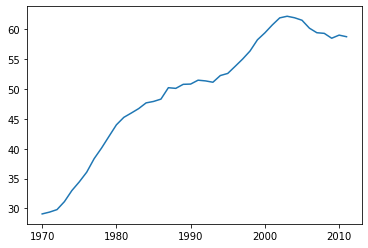

In [4]:
# Generate a line chart that visualizes the historical percentage of Biology degrees awarded to women
plt.plot(women_degrees["Year"], women_degrees["Biology"])
plt.show()

From the plot, we can tell that `Biology` degrees increased steadily from 1970 and peaked in the early 2000's. We can also tell that the percentage has stayed above 50% since around 1987. While it's helpful to visualize the trend of `Biology` degrees awarded to women, it only tells half the story. If we want the gender gap to be apparent and emphasized in the plot, we need a visual analogy to the difference in the percentages between the genders.

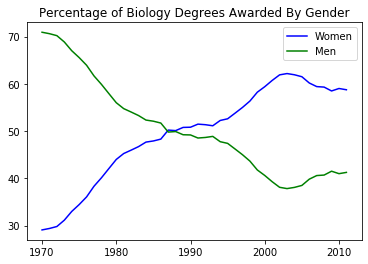

In [5]:
plt.plot(women_degrees["Year"], women_degrees["Biology"], 
         c = "blue", label = "Women")
plt.plot(women_degrees["Year"], 100- women_degrees["Biology"], 
         c = "green", label = "Men")
plt.legend(loc = "upper right")
plt.title("Percentage of Biology Degrees Awarded By Gender")
plt.show()

In the first period, from 1970 to around 1987, women were a minority when it came to majoring in `Biology` while in the second period, from around 1987 to around 2012, women became a majority. We can see the point where women overtook men where the lines intersect.

Reducing **chartjunk** (extra visual elements) by maximinzing **data-ink** ratio. **Non-data ink** includes any elements in the chart that don't directly display data points. This includes `tick markers`, `tick labels`, and `legends`. **Data ink** includes any elements that display and depend on the data points underlying the chart.

To customize the appearance of the ticks, we use the `Axes.tick_params()` method. Using this method, we can modify which `tick marks` and `tick labels` are displayed. By default, `matplotlib` displays the tick marks on all four sides of the plot. Here are the four sides for a standard line chart:

* The left side is the y-axis.
* The bottom side is the x-axis.
* The top side is across from the x-axis.
* The right side is across from the y-axis.

To hide all of them, we need to pass in the following values for each parameter when we call `Axes.tick_params()`:

* bottom: "off"
* top: "off"
* left: "off"
* right: "off"

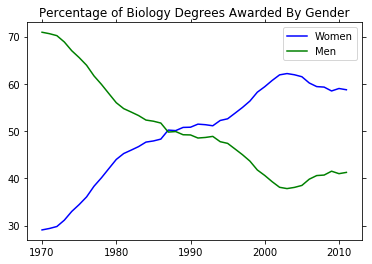

In [6]:
fig, ax = plt.subplots()

ax.plot(women_degrees["Year"], women_degrees["Biology"], c = "blue",
        label = "Women")
ax.plot(women_degrees["Year"], 100- women_degrees["Biology"],  
        c = "green", label = "Men")
ax.legend(loc = "upper right")
ax.set_title("Percentage of Biology Degrees Awarded By Gender")
ax.tick_params(bottom = "off", left = "off", right = "off", top = "off") # Remove all of the axis tick marks(will retain tick labels).

plt.show()

**Chartjunk** becomes much more noticeable when we have multiple plots in the same chart. By keeping the `axis tick labels` but not the `spines` or `tick marks`, we strike an appropriate balance between hiding chartjunk and making the data visible.

In matplotlib, the spines are represented using the `matplotlib.spines.Spine` class. When we create an `Axes` instance, four Spine objects are created for us. If we run **print(ax.spines)**, we'll get back a dictionary of the Spine objects

To hide all of the spines, we need to:

* access each Spine object in the dictionary
* call the `Spine.set_visible()` method
* pass in the Boolean value `False`

The following line of code removes the spines for the right axis:

`ax.spines["right"].set_visible(False)`


left Spine
right Spine
bottom Spine
top Spine


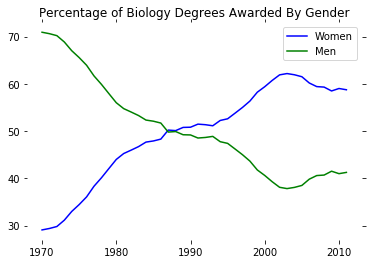

In [7]:
fix, ax = plt.subplots()

ax.plot(women_degrees["Year"], women_degrees["Biology"], c = "blue",
        label = "Women")
ax.plot(women_degrees["Year"], 100- women_degrees["Biology"], 
        c = "green", label = "Men")
ax.legend(loc = "upper right")
ax.set_title("Percentage of Biology Degrees Awarded By Gender")
ax.tick_params(bottom = "off", left = "off", right = "off", top = "off") 
for key, value in ax.spines.items():
    print(key, value)
    value.set_visible(False)
plt.show()

If we want to generate charts to compare multiple degree categories, the axis ranges need to be consistent. Inconsistent data ranges can distort the story our charts are telling and fool the viewer.

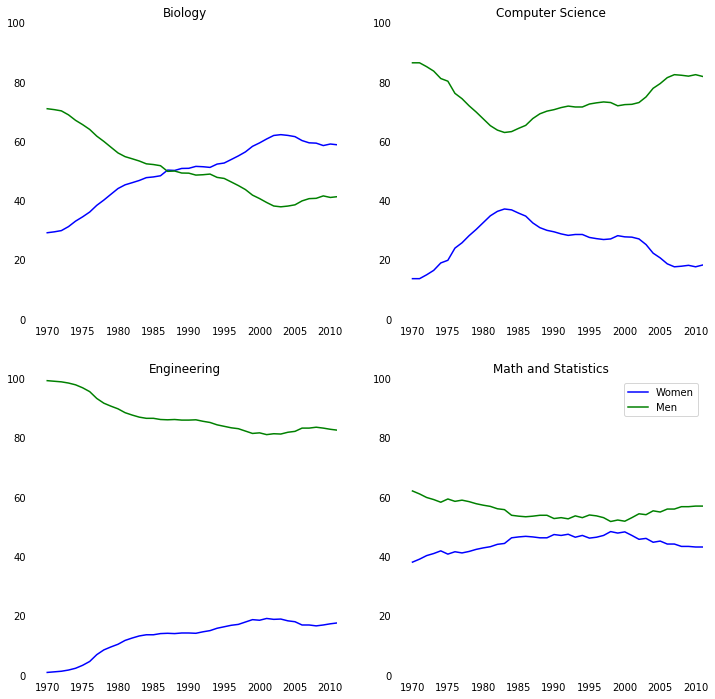

In [53]:
major_cats = ["Biology","Computer Science", "Engineering","Math and Statistics"]
fig = plt.figure(figsize = (12,12))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(women_degrees["Year"], women_degrees[major_cats[i]],
            c="blue", label = "Women")
    ax.plot(women_degrees["Year"], 100 -women_degrees[major_cats[i]],
            c="green", label = "Men")
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.tick_params(bottom = "off", top = "off", right = "off", left = "off")
    ax.set_title(major_cats[i])
    for key, spine in ax.spines.items():
        spine.set_visible(False)
ax.legend(loc = "upper right")    
plt.show()
    

By spending just a few seconds reading the chart, we can conclude that the gender gap in **Computer Science** and **Engineering** have big gender gaps while the gap in **Biology** and **Math** and **Statistics** are quite small. In addition, the first two degree categories are dominated by **men** while the latter degree categories are much more balanced.

We explored how to enhance a chart's storytelling capabilities by minimizing chartjunk and encouraging comparison.